In [0]:
import numpy as np

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4752878539151402989, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2911099324081975116
 physical_device_desc: "device: XLA_CPU device"]

In [0]:
%%writefile test.py
print("hello colab!")

Overwriting test.py


In [0]:
run test.py

hello colab!


In [0]:
!pwd

/content


In [0]:
from google.colab import files
files.download('test.py')

In [0]:
pip install kaggle

In [0]:
from google.colab import files

In [0]:
!rm kaggle.json

In [0]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"coldbrain","key":"42a2cb63b2fe8f8d10f2fd0c5ad75190"}'}

In [0]:
!mkdir -p ~/kaggle

In [0]:
!ls

'kaggle (1).json'   sample_data		   test1.zip   train.zip
 kaggle.json	    sampleSubmission.csv   test.py


In [0]:
!ls -al

total 833980
drwxr-xr-x 1 root root      4096 May 12 00:57 .
drwxr-xr-x 1 root root      4096 May 12 00:18 ..
drwxr-xr-x 1 root root      4096 May  8 16:16 .config
-rw-r--r-- 1 root root        65 May 12 00:56 kaggle.json
drwxr-xr-x 1 root root      4096 May  4 16:26 sample_data
-rw-r--r-- 1 root root     88903 May 12 00:53 sampleSubmission.csv
-rw-r--r-- 1 root root 284321224 May 12 00:53 test1.zip
-rw-r--r-- 1 root root        21 May 12 00:30 test.py
-rw-r--r-- 1 root root 569546721 May 12 00:53 train.zip


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!ls -lha ~/.kaggle/kaggle.json

-rw------- 1 root root 65 May 12 00:57 /root/.kaggle/kaggle.json


In [0]:
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       2878           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      21161           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       4966           False  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        397           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       2201           False  
competitive-data-science-predict-future-sales     2020-12-31 23:59:00  Playground           Kudos       6706   

In [0]:
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  test.py  train.zip


In [0]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls gdrive/My\ Drive/test

'0512(day3).ipynb'   abc


In [0]:
!mkdir gdrive/My\ Drive/test/abc

mkdir: cannot create directory ‘gdrive/My Drive/test/abc’: File exists


In [0]:
!touch gdrive/My\ Drive/test/abc/xyz.txt

In [0]:
!umount /content/gdrive/

umount: /content/gdrive/: not mounted.


In [0]:
!ls gdrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!ls gdrive/My\ Drive

 박기웅   test	'제목없는 폴더.zip'


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(1, 3, 3, 1)


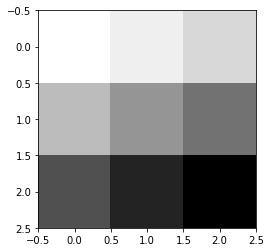

In [0]:
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)   #(1,3,3,1) ==(batch, height, width, channels)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


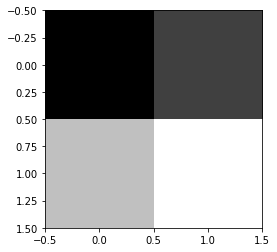

In [0]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


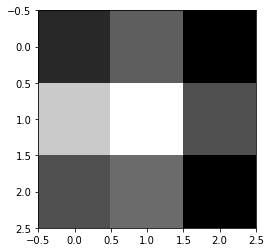

In [0]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


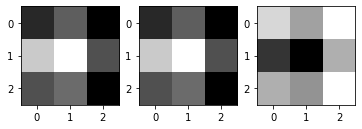

In [0]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

In [0]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [0]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


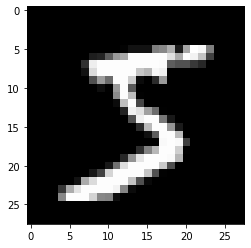

In [0]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


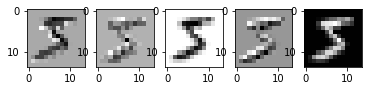

In [0]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2), padding='SAME', #strider (가로,세로)
                             kernel_initializer=weight_init)(img)
print(conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


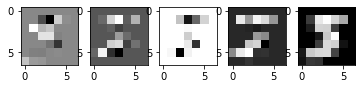

In [0]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
